<a href="https://colab.research.google.com/github/jpsthome/EY-Fast-Track-ML/blob/main/can_i_eat_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento da IA

Importação das bibliotecas necessárias

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Extraindo imagens do dataset

In [2]:
_URL = 'https://drive.google.com/u/0/uc?id=1eUeEbkPeJnKv0vobili48vW8xL41SAxE&export=download&confirm=t'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

217209011/217209011 [==============================] - 2s 0us/step


Listando diretórios baixados

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/can_i_eat_ai_dataset
/root/.keras/datasets/can_i_eat_ai_dataset/validation
/root/.keras/datasets/can_i_eat_ai_dataset/validation/banana_bad
/root/.keras/datasets/can_i_eat_ai_dataset/validation/lime_bad
/root/.keras/datasets/can_i_eat_ai_dataset/validation/apple_bad
/root/.keras/datasets/can_i_eat_ai_dataset/validation/orange_good
/root/.keras/datasets/can_i_eat_ai_dataset/validation/apple_good
/root/.keras/datasets/can_i_eat_ai_dataset/validation/lime_good
/root/.keras/datasets/can_i_eat_ai_dataset/validation/banana_good
/root/.keras/datasets/can_i_eat_ai_dataset/validation/orange_bad
/root/.keras/datasets/can_i_eat_ai_dataset/validation/guava_good
/root/.keras/datasets/can_i_eat_ai_dataset/validation/guava_bad
/root/.keras/datasets/can_i_eat_ai_dataset/train
/root/.keras/datasets/can_i_eat_ai_dataset/train/banana_bad
/root/.keras/datasets/can_i_eat_ai_dataset/train/lime_bad
/root/.keras/datasets/can_i_eat_ai_dataset/train/apple_bad
/root/.k

## Ajustando rotas para os conjuntos de treinamento e validação e verificando as quantidade das imagens disponíveis

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'can_i_eat_ai_dataset')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_banana_bad_dir = os.path.join(train_dir, 'banana_bad') 
train_banana_good_dir = os.path.join(train_dir, 'banana_good')
train_apple_bad_dir = os.path.join(train_dir, 'apple_bad') 
train_apple_good_dir = os.path.join(train_dir, 'apple_good')
train_orange_bad_dir = os.path.join(train_dir, 'orange_bad') 
train_orange_good_dir = os.path.join(train_dir, 'orange_good')
train_lime_bad_dir = os.path.join(train_dir, 'lime_bad') 
train_lime_good_dir = os.path.join(train_dir, 'lime_good')
train_guava_bad_dir = os.path.join(train_dir, 'guava_bad') 
train_guava_good_dir = os.path.join(train_dir, 'guava_good')


validation_banana_bad_dir = os.path.join(validation_dir, 'banana_bad') 
validation_banana_good_dir = os.path.join(validation_dir, 'banana_good')
validation_apple_bad_dir = os.path.join(validation_dir, 'apple_bad') 
validation_apple_good_dir = os.path.join(validation_dir, 'apple_good')
validation_orange_bad_dir = os.path.join(validation_dir, 'orange_bad') 
validation_orange_good_dir = os.path.join(validation_dir, 'orange_good')
validation_lime_bad_dir = os.path.join(validation_dir, 'lime_bad') 
validation_lime_good_dir = os.path.join(validation_dir, 'lime_good')
validation_guava_bad_dir = os.path.join(validation_dir, 'guava_bad') 
validation_guava_good_dir = os.path.join(validation_dir, 'guava_good')

num_banana_bad_tr = len(os.listdir(train_banana_bad_dir))
num_banana_good_tr = len(os.listdir(train_banana_good_dir))
num_apple_bad_tr = len(os.listdir(train_apple_bad_dir))
num_apple_good_tr = len(os.listdir(train_apple_good_dir))
num_orange_bad_tr = len(os.listdir(train_orange_bad_dir))
num_orange_good_tr = len(os.listdir(train_orange_good_dir))
num_lime_good_tr = len(os.listdir(train_lime_good_dir))
num_lime_bad_tr = len(os.listdir(train_lime_bad_dir))
num_guava_bad_tr = len(os.listdir(train_guava_bad_dir))
num_guava_good_tr = len(os.listdir(train_guava_good_dir))

num_banana_bad_val = len(os.listdir(validation_banana_bad_dir))
num_banana_good_val = len(os.listdir(validation_banana_good_dir))
num_apple_bad_val = len(os.listdir(validation_apple_bad_dir))
num_apple_good_val = len(os.listdir(validation_apple_good_dir))
num_orange_bad_val = len(os.listdir(validation_orange_bad_dir))
num_orange_good_val = len(os.listdir(validation_orange_good_dir))
num_lime_good_val = len(os.listdir(validation_lime_good_dir))
num_lime_bad_val = len(os.listdir(validation_lime_bad_dir))
num_guava_bad_val = len(os.listdir(validation_guava_bad_dir))
num_guava_good_val = len(os.listdir(validation_guava_good_dir))


total_train = num_banana_bad_tr + num_banana_good_tr + num_apple_bad_tr + num_apple_good_tr + num_orange_bad_tr + num_orange_good_tr + num_lime_good_tr + num_lime_bad_tr + num_guava_bad_tr + num_guava_good_tr

total_val = num_banana_bad_val + num_banana_good_val + num_apple_bad_val + num_apple_good_val + num_orange_bad_val + num_orange_good_val + num_lime_good_val + num_lime_bad_val + num_guava_bad_val + num_guava_good_val

In [5]:
print('total training good apple images:', num_apple_good_tr)
print('total training good banana images:', num_banana_good_tr)
print('total training good lime images:', num_lime_good_tr)
print('total training good guava images:', num_guava_good_tr)
print('total training good orange images:', num_orange_good_tr)
print('total training bad apple images:', num_apple_bad_tr)
print('total training bad banana images:', num_banana_bad_tr)
print('total training bad lime images:', num_lime_bad_tr)
print('total training bad guava images:', num_guava_bad_tr)
print('total training bad orange images:', num_orange_bad_tr)

print("--")

print('total validation good apple images:', num_apple_good_val)
print('total validation good banana images:', num_banana_good_val)
print('total validation good lime images:', num_lime_good_val)
print('total validation good guava images:', num_guava_good_val)
print('total validation good orange images:', num_orange_good_val)
print('total validation bad apple images:', num_apple_bad_val)
print('total validation bad banana images:', num_banana_bad_val)
print('total validation bad lime images:', num_lime_bad_val)
print('total validation bad guava images:', num_guava_bad_val)
print('total validation bad orange images:', num_orange_bad_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training good apple images: 862
total training good banana images: 835
total training good lime images: 822
total training good guava images: 864
total training good orange images: 912
total training bad apple images: 856
total training bad banana images: 815
total training bad lime images: 814
total training bad guava images: 847
total training bad orange images: 870
--
total validation good apple images: 287
total validation good banana images: 278
total validation good lime images: 272
total validation good guava images: 288
total validation good orange images: 304
total validation bad apple images: 285
total validation bad banana images: 272
total validation bad lime images: 271
total validation bad guava images: 282
total validation bad orange images: 289
--
Total training images: 8497
Total validation images: 2828


## Definindo parametros do modelo

In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 150

# Preparando os dados

In [7]:
train_image_generator      = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [8]:
# train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                            directory=train_dir,
#                                                            shuffle=True,
#                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                            class_mode='binary')

train_data_gen = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)


Found 8497 files belonging to 10 classes.


In [9]:
class_names = train_data_gen.class_names
print(class_names)

['apple_bad', 'apple_good', 'banana_bad', 'banana_good', 'guava_bad', 'guava_good', 'lime_bad', 'lime_good', 'orange_bad', 'orange_good']


In [10]:
# val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                               directory=validation_dir,
#                                                               shuffle=False,
#                                                               target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
#                                                               class_mode='binary')

val_data_gen = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)

Found 2828 files belonging to 10 classes.


## Visualizando as imagens de treinamento

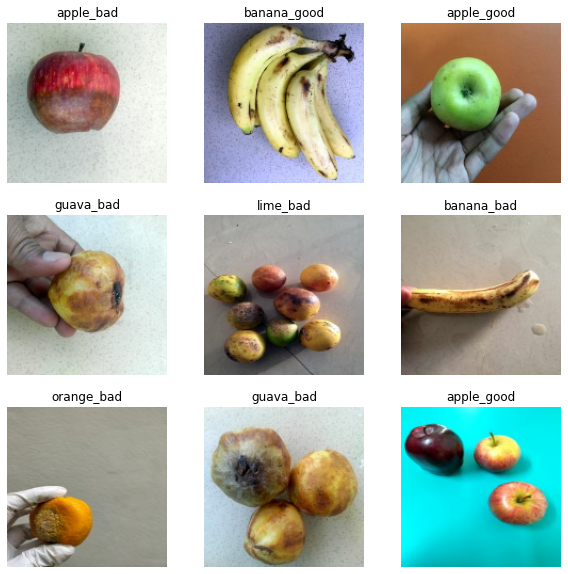

In [11]:
# sample_training_images, _ = next(train_data_gen) 
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()
# plotImages(sample_training_images[:5])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data_gen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Criando o Modelo

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

##Treinando o Modelo

In [15]:
EPOCHS = 50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


85/85 [==============================] - 25s 150ms/step - loss: 4.4087 - accuracy: 0.4691 - val_loss: 0.7734 - val_accuracy: 0.7493
Epoch 2/50
85/85 [==============================] - 12s 133ms/step - loss: 0.5628 - accuracy: 0.8216 - val_loss: 0.3939 - val_accuracy: 0.8844
Epoch 3/50
85/85 [==============================] - 13s 142ms/step - loss: 0.2776 - accuracy: 0.9143 - val_loss: 0.3228 - val_accuracy: 0.9063
Epoch 4/50
85/85 [==============================] - 12s 134ms/step - loss: 0.1803 - accuracy: 0.9394 - val_loss: 0.3034 - val_accuracy: 0.9208
Epoch 5/50
85/85 [==============================] - 12s 133ms/step - loss: 0.1194 - accuracy: 0.9626 - val_loss: 0.2737 - val_accuracy: 0.9310
Epoch 6/50
85/85 [==============================] - 12s 133ms/step - loss: 0.1066 - accuracy: 0.9647 - val_loss: 0.2893 - val_accuracy: 0.9342
Epoch 7/50
85/85 [==============================] - 12s 133ms/step - loss: 0.0937 - accuracy: 0.9708 - val_loss: 0.2778 - val_accuracy: 0.9314
Epoch 8/50

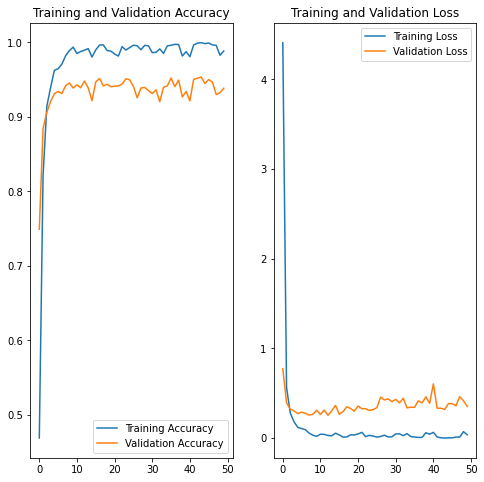

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

# Conseguindo foto para ser analisada

In [17]:
import imutils #redimencionamento, rotacao
import numpy as np
import cv2 #import OpenCV
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript #webcan leitura
from google.colab.output import eval_js #webcan leitura
from base64 import b64decode #biblioteca para codificar dados binários
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Abrindo Webcam

In [18]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Caputando a imagem

<IPython.core.display.Javascript object>

400 300


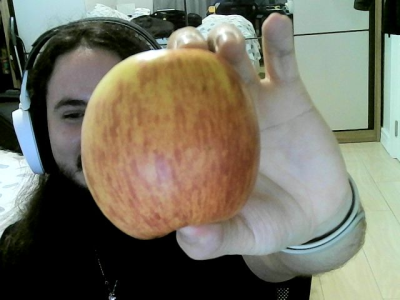

In [26]:
image_file = take_photo()

image = cv2.imread(image_file)

# redimensiona para ter uma largura máxima de 400 pixels
image = imutils.resize(image,  width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [27]:
# photo_path = 'photo.jpg'
# photo = tf.keras.utils.get_file('photo', origin='photo.jpg')
resized = cv2.resize(image, (150,150), interpolation = cv2.INTER_AREA)

# imagem = tf.keras.utils.get_file('photo.jpg', origin=image)
# img = tf.keras.utils.load_img(
#     imagem, target_size=(150, 150)
# )

img_array = tf.keras.utils.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to banana_bad with a 96.62 percent confidence.
